# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [32]:
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

載入 相關套件 並 執行 PCA 實驗 ...

In [33]:
X.shape, y.shape

((537, 64), (537,))

In [34]:
import pandas as pd
data = pd.DataFrame(X)
data = data/16
data['class'] = y
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,class
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.3750,0.8125,0.6250,0.0000,0.0000,0.0,0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.6250,0.0000,0.0,1
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.1875,0.6875,1.0000,0.5625,0.0,2
3,0.0,0.0,0.0625,0.5625,0.9375,0.6875,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0625,0.6250,0.8125,0.1875,0.0000,0.0,0
4,0.0,0.0,0.0000,0.0000,0.8750,0.8125,0.0625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0625,0.8125,1.0000,0.0625,0.0,1


In [35]:
X = data.iloc[:, :64]
X.shape, X.head()

((537, 64),
     0    1       2       3       4       5       6    7    8    9   ...  \
 0  0.0  0.0  0.3125  0.8125  0.5625  0.0625  0.0000  0.0  0.0  0.0  ...   
 1  0.0  0.0  0.0000  0.7500  0.8125  0.3125  0.0000  0.0  0.0  0.0  ...   
 2  0.0  0.0  0.0000  0.2500  0.9375  0.7500  0.0000  0.0  0.0  0.0  ...   
 3  0.0  0.0  0.0625  0.5625  0.9375  0.6875  0.0000  0.0  0.0  0.0  ...   
 4  0.0  0.0  0.0000  0.0000  0.8750  0.8125  0.0625  0.0  0.0  0.0  ...   
 
        54   55   56   57      58      59      60      61      62   63  
 0  0.0000  0.0  0.0  0.0  0.3750  0.8125  0.6250  0.0000  0.0000  0.0  
 1  0.0000  0.0  0.0  0.0  0.0000  0.6875  1.0000  0.6250  0.0000  0.0  
 2  0.3125  0.0  0.0  0.0  0.0000  0.1875  0.6875  1.0000  0.5625  0.0  
 3  0.0000  0.0  0.0  0.0  0.0625  0.6250  0.8125  0.1875  0.0000  0.0  
 4  0.0000  0.0  0.0  0.0  0.0000  0.0625  0.8125  1.0000  0.0625  0.0  
 
 [5 rows x 64 columns])

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X = pca.fit_transform(X)

X.shape

(537, 3)

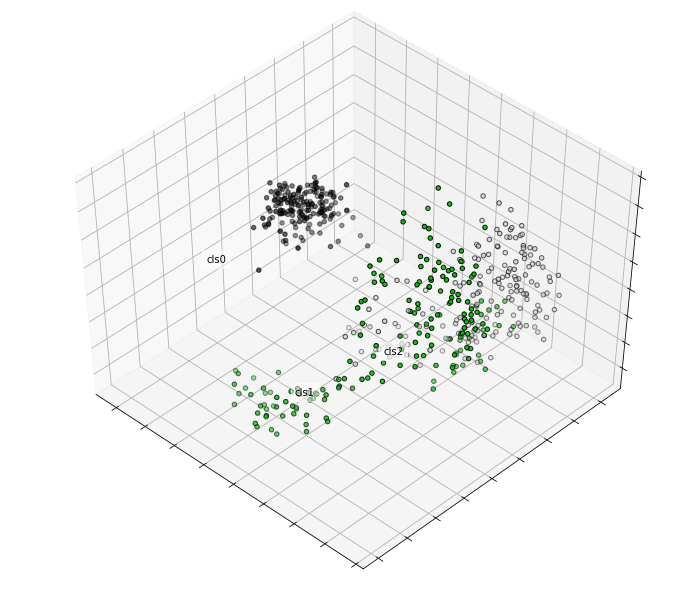

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('cls0', 0), ('cls1', 1), ('cls2', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()